In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [56]:
def compute_next(z:complex,const:complex) -> complex:
  return z**2 + const

def compute_iterations(z0:complex,const:complex,max_iterations:int,threshold=4) -> int:
  zn = z0
  iterations = 0
  while(abs(zn)<=threshold and iterations<max_iterations):
    zn = compute_next(zn,const)
    iterations += 1
  return iterations


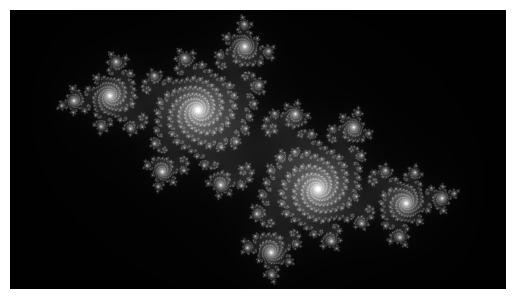

In [146]:
rtest = (240,427)
rsd = (480,854)
rhd = (720,1280)
rfull_hd = (1080,1920)
r4k = (2160,3840)

im = np.zeros(r4k,dtype='int')
scale = 1/im.shape[1]
scale *= 3.5
for i in range(im.shape[0]):
  for j in range(im.shape[1]):
    x = (i-im.shape[0]/2)*scale
    y = (j-im.shape[1]/2)*scale
    z0 = complex(y,x)
    c_re = -0.5251993
    c_im = -0.5251993
    c_im = -0.515
    c_complex = complex(c_re,c_im)
    im[i,j] = compute_iterations(z0,c_complex,255,2)
plt.axis(False)
plt.imshow(im, cmap='gray', vmin=0, vmax=255)
# plt.imshow(im)

In [147]:
name = f'{c_re}.{c_im}.png'
cv2.imwrite(name,im)

True

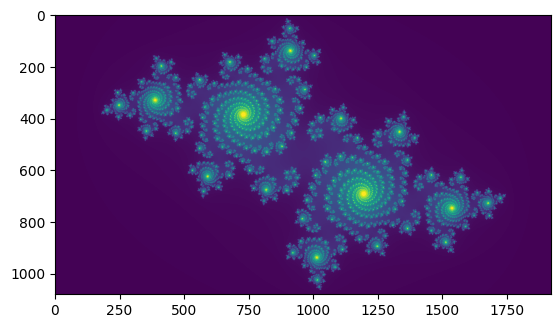

In [144]:
plt.imshow(im)